## Aim: To get familiar with OpenCV operations
### Note: Use matplotlib or OpenCV to display images 

In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Question 1

In [2]:
#read image opencv-logo
#display shape and size of the image

#Answer
image = cv2.imread('opencv-logo.png')
image_shape = image.shape  
image_size = image.size 
print(f"Image Shape (Height, Width, Channels): {image_shape}")
print(f"Image Size (Total number of pixels): {image_size}")

Image Shape (Height, Width, Channels): (739, 600, 3)
Image Size (Total number of pixels): 1330200


### Question 2

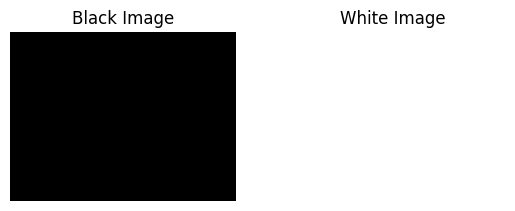

In [3]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image

#Answer
black_image = np.zeros((150, 200, 3), dtype=np.uint8) 
white_image = np.ones((150, 200, 3), dtype=np.uint8) * 255  

plt.subplot(1, 2, 1)
plt.imshow(black_image)
plt.title("Black Image")
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(white_image)
plt.title("White Image")
plt.axis('off')  

plt.show()



### Question 3

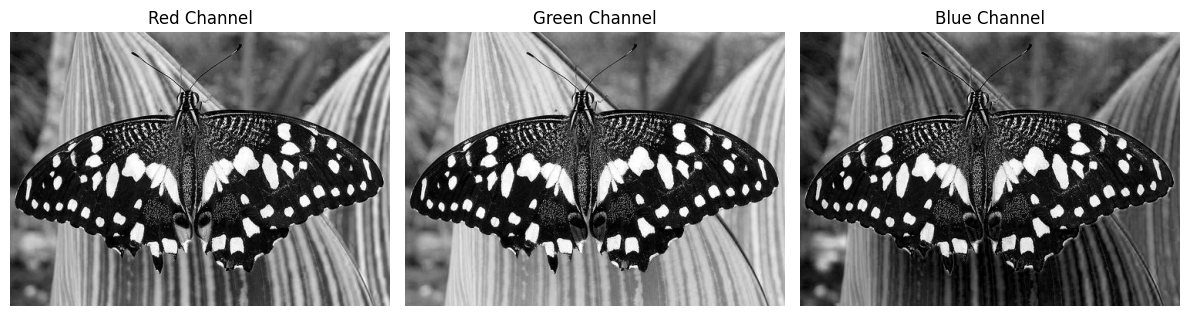

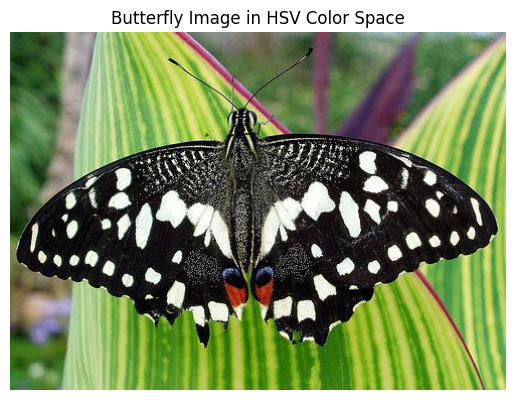

In [4]:
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

#Answer
butterfly_image = cv2.imread('butterfly.jpg')

B, G, R = cv2.split(butterfly_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(R, cmap='gray')
axes[0].set_title("Red Channel")
axes[0].axis('off') 

axes[1].imshow(G, cmap='gray')
axes[1].set_title("Green Channel")
axes[1].axis('off')

axes[2].imshow(B, cmap='gray')
axes[2].set_title("Blue Channel")
axes[2].axis('off')

plt.tight_layout()
plt.show()

butterfly_hsv = cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2HSV)

butterfly_hsv_rgb = cv2.cvtColor(butterfly_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(butterfly_hsv_rgb)
plt.title("Butterfly Image in HSV Color Space")
plt.axis('off') 
plt.show()


### Question 4

5x5 Array of 10s:
 [[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]

Random Array:
 [[0.96125368 0.22388822 0.69765988 0.56737801 0.88399797]
 [0.40637315 0.95342943 0.51828194 0.39485937 0.7185734 ]
 [0.53121075 0.19811018 0.57839626 0.27883089 0.63415116]
 [0.85370218 0.34267823 0.72640079 0.31828952 0.43624681]
 [0.59476777 0.97288898 0.43849064 0.61982818 0.0862226 ]]

Largest Value in Random Array: 0.9728889758145485
Smallest Value in Random Array: 0.08622260256945324


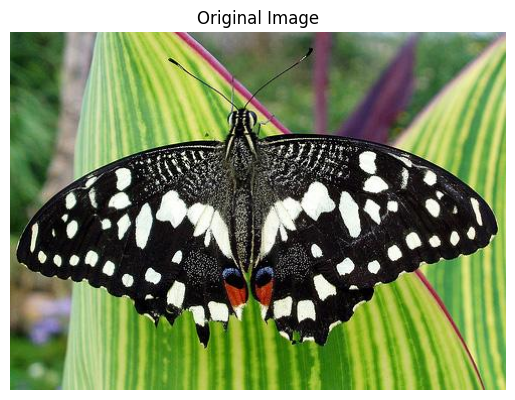

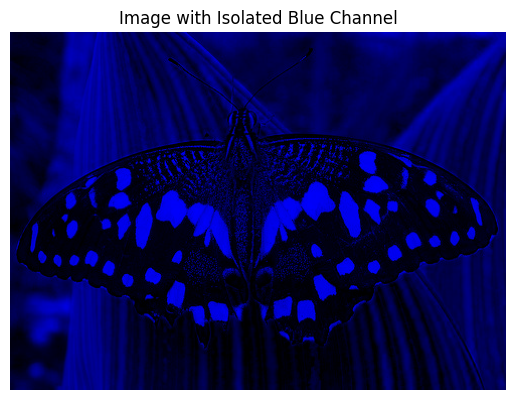

In [5]:
#create a 5 by 5 array where every number is a 10
#run the cell below to create an array of random numbers and see if you can figure out how it works.
#what are the largest and smalled values in this array?
#use PIL and matplotlib to read and display the any image of your choice from the given images.
#convert the image to a NumPy Array
#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel

#Answer

array_10 = np.full((5, 5), 10)
print("5x5 Array of 10s:\n", array_10)

random_array = np.random.random((5, 5))
print("\nRandom Array:\n", random_array)

largest_value = random_array.max()
smallest_value = random_array.min()

print(f"\nLargest Value in Random Array: {largest_value}")
print(f"Smallest Value in Random Array: {smallest_value}")

image = Image.open('butterfly.jpg')

image_np = np.array(image)

# original image
plt.imshow(image_np)
plt.title("Original Image")
plt.axis('off')
plt.show()

image_np[:, :, 0] = 0 
image_np[:, :, 1] = 0  

# Isolated Blue channel Image
plt.imshow(image_np)
plt.title("Image with Isolated Blue Channel")
plt.axis('off')  # Hide axes
plt.show()

### Question 5

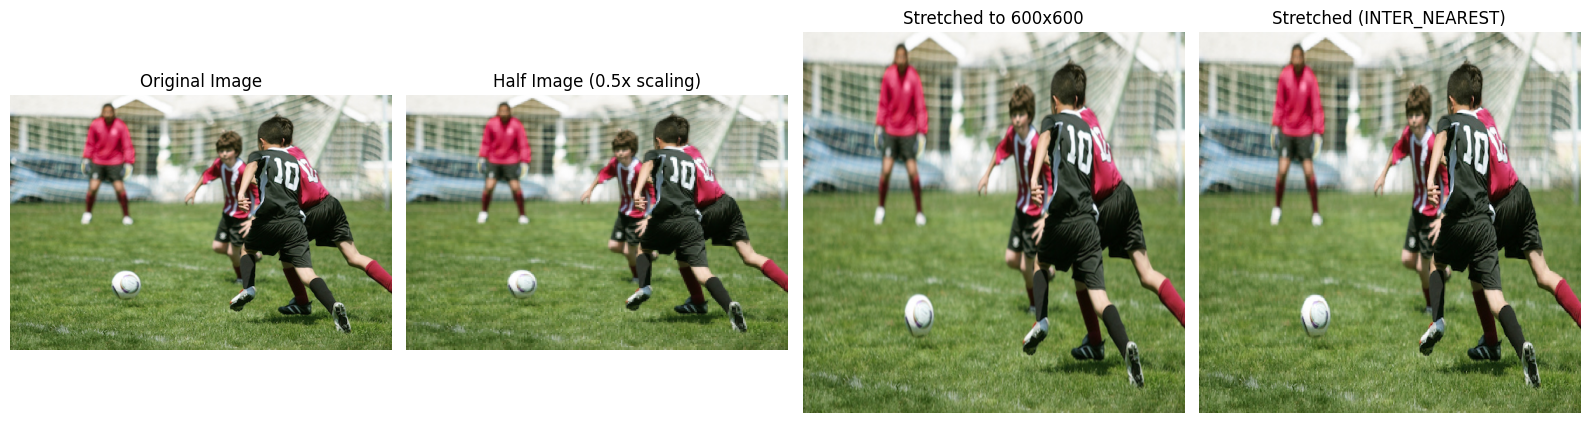

In [6]:
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

#Answer

players_image = cv2.imread('players.jpg')
players_image_rgb = cv2.cvtColor(players_image, cv2.COLOR_BGR2RGB)

# Half the image using dim=(0,0), fx=0.5, fy=0.5
half_image = cv2.resize(players_image_rgb, (0, 0), fx=0.5, fy=0.5)

# Stretch the image to dim = (600, 600)
stretched_image = cv2.resize(players_image_rgb, (600, 600))

# Stretch the image using interpolation=cv2.INTER_NEAREST
stretched_image_nearest = cv2.resize(players_image_rgb, (600, 600), interpolation=cv2.INTER_NEAREST)

fig, axes = plt.subplots(1, 4, figsize=(16, 8))

# Original Image
axes[0].imshow(players_image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Half Image
axes[1].imshow(half_image)
axes[1].set_title("Half Image (0.5x scaling)")
axes[1].axis('off')

# Stretched Image
axes[2].imshow(stretched_image)
axes[2].set_title("Stretched to 600x600")
axes[2].axis('off')

# Stretched Image with INTER_NEAREST
axes[3].imshow(stretched_image_nearest)
axes[3].set_title("Stretched (INTER_NEAREST)")
axes[3].axis('off')

plt.tight_layout()
plt.show()

### Question 6

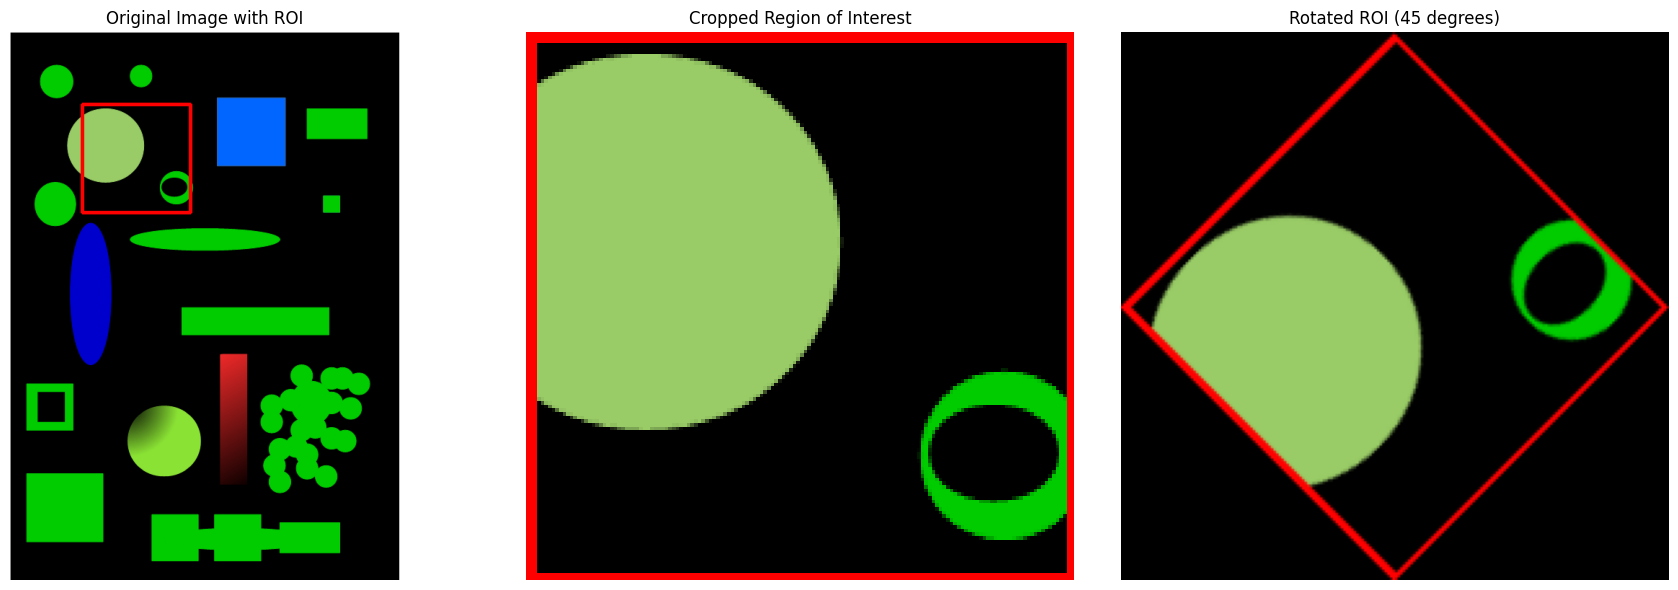

In [7]:
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

#Answer

image = cv2.imread('detect_blob.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

x, y, w, h = 100, 100, 150, 150  

# Draw a rectangle around the blue solid box in the original image
cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)  # Taking red for visibility

# Crop the region of interest (ROI)
roi = image_rgb[y:y+h, x:x+w]

# Rotate the cropped region by 45 degrees without clipping
(h_roi, w_roi) = roi.shape[:2]
center = (w_roi // 2, h_roi // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)

cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])

new_width = int((h_roi * sin) + (w_roi * cos))
new_height = int((h_roi * cos) + (w_roi * sin))

rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

rotated_roi = cv2.warpAffine(roi, rotation_matrix, (new_width, new_height))

# Display the original image with the ROI marked, cropped image, and rotated cropped image

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original Image with Rectangle around ROI
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image with ROI")
axes[0].axis('off')

# Cropped ROI
axes[1].imshow(roi)
axes[1].set_title("Cropped Region of Interest")
axes[1].axis('off')

# Rotated ROI
axes[2].imshow(rotated_roi)
axes[2].set_title("Rotated ROI (45 degrees)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Question 7

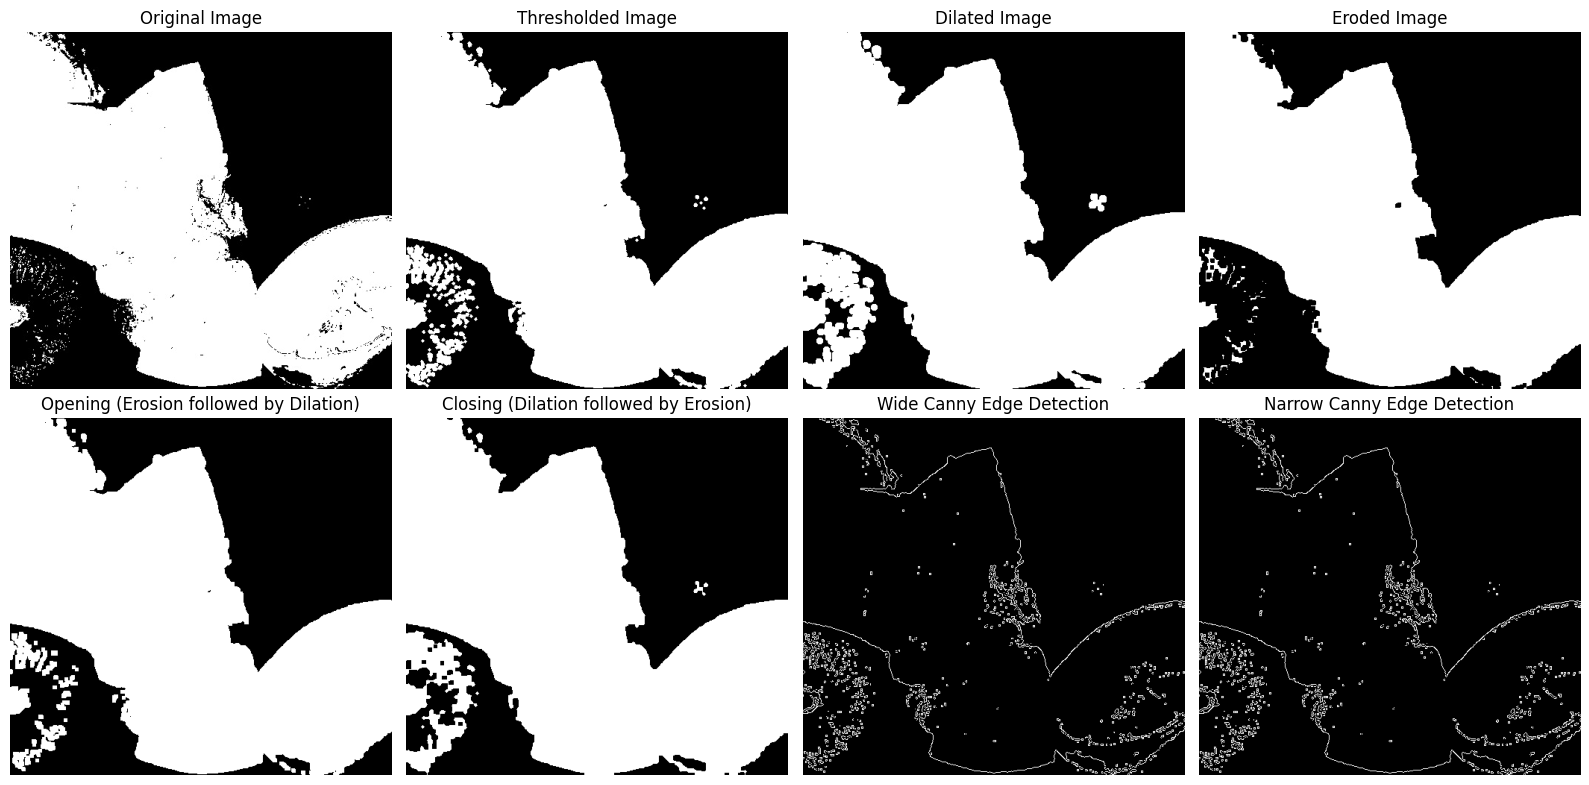

In [8]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image (Hint: look into Opencv for operations)
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

#Answer

image = cv2.imread('thresh.jpg', cv2.IMREAD_GRAYSCALE)  # Read as grayscale

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

_, thresholded_image = cv2.threshold(blurred_image, 5, 55, cv2.THRESH_BINARY)

# 5x5 kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Performing dilation, erosion, opening, and closing

# Dilation
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=1)

# Erosion
eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)

# Opening
opening_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)

# Closing
closing_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# 5. Apply Canny edge detection
wide_canny = cv2.Canny(image, 50, 150)

narrow_canny = cv2.Canny(image, 100, 200)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Thresholded Image
axes[0, 1].imshow(thresholded_image, cmap='gray')
axes[0, 1].set_title("Thresholded Image")
axes[0, 1].axis('off')

# Dilated Image
axes[0, 2].imshow(dilated_image, cmap='gray')
axes[0, 2].set_title("Dilated Image")
axes[0, 2].axis('off')

# Eroded Image
axes[0, 3].imshow(eroded_image, cmap='gray')
axes[0, 3].set_title("Eroded Image")
axes[0, 3].axis('off')

# Opening Image
axes[1, 0].imshow(opening_image, cmap='gray')
axes[1, 0].set_title("Opening (Erosion followed by Dilation)")
axes[1, 0].axis('off')

# Closing Image
axes[1, 1].imshow(closing_image, cmap='gray')
axes[1, 1].set_title("Closing (Dilation followed by Erosion)")
axes[1, 1].axis('off')

# Wide Canny Edge Detection
axes[1, 2].imshow(wide_canny, cmap='gray')
axes[1, 2].set_title("Wide Canny Edge Detection")
axes[1, 2].axis('off')

# Narrow Canny Edge Detection
axes[1, 3].imshow(narrow_canny, cmap='gray')
axes[1, 3].set_title("Narrow Canny Edge Detection")
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

### Question 8

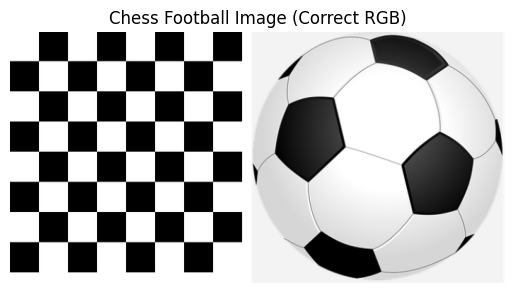

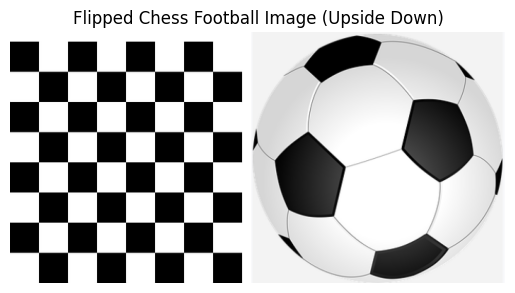

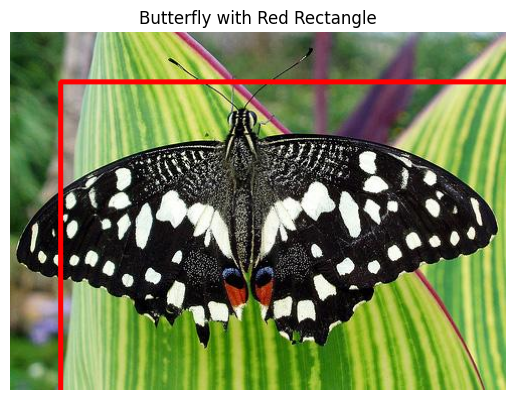

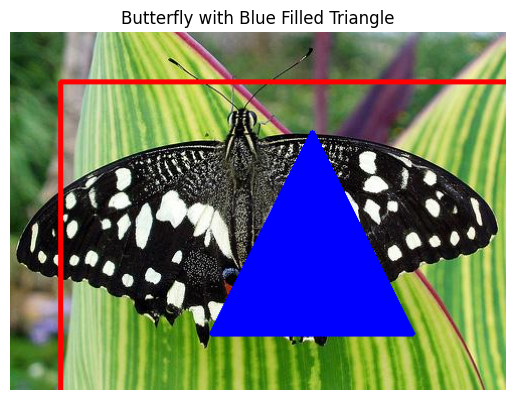

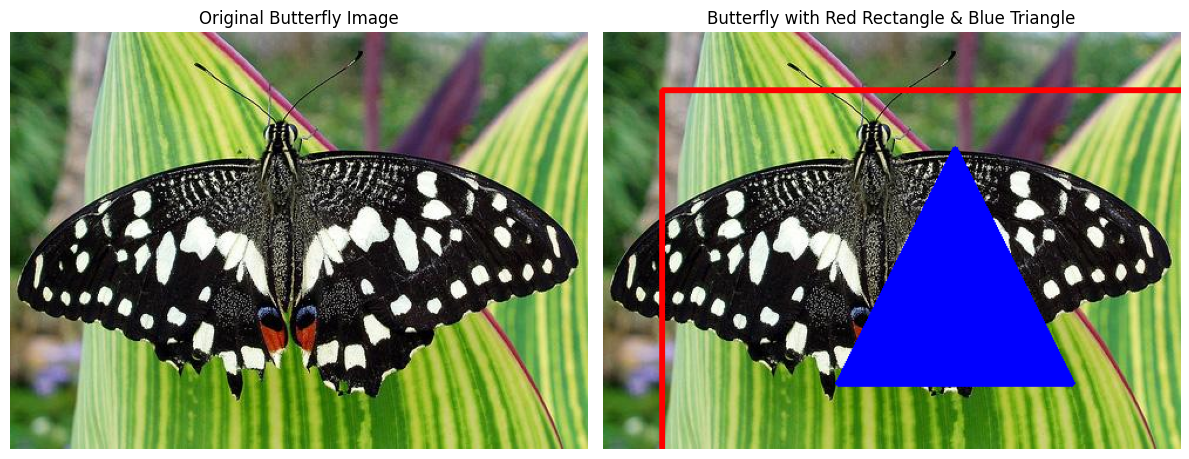

In [9]:
#read in the butterfly image
#open the chess_football image and display it in the notebook. Make sure to correct for the RGB order
#flip the image upside down and display it in the notebook.
#draw an empty RED rectangle around the butterfly and display the image in the notebook.
#draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.
#now fill in this triangle
#display the original image as well as the resultant image

#Answer

butterfly_image = cv2.imread('butterfly.jpg')
butterfly_image_rgb = cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB)

chess_football_image = cv2.imread('chess_football.png')
chess_football_image_rgb = cv2.cvtColor(chess_football_image, cv2.COLOR_BGR2RGB)

plt.imshow(chess_football_image_rgb)
plt.title("Chess Football Image (Correct RGB)")
plt.axis('off')
plt.show()

flipped_image = cv2.flip(chess_football_image_rgb, 0)  

plt.imshow(flipped_image)
plt.title("Flipped Chess Football Image (Upside Down)")
plt.axis('off')
plt.show()

# Empty RED rectangle around the butterfly
rectangle_image = butterfly_image_rgb.copy()
cv2.rectangle(rectangle_image, (50, 50), (550, 400), (255, 0, 0), 3)  

# Display the image with a rectangle
plt.imshow(rectangle_image)
plt.title("Butterfly with Red Rectangle")
plt.axis('off')
plt.show()

# Draw a BLUE TRIANGLE in the middle of the butterfly image
triangle_image = rectangle_image.copy()

pts = np.array([[300, 100], [400, 300], [200, 300]], np.int32)
pts = pts.reshape((-1, 1, 2))

cv2.polylines(triangle_image, [pts], isClosed=True, color=(0, 0, 255), thickness=3)  
cv2.fillPoly(triangle_image, [pts], color=(0, 0, 255))  

# Display the image with the filled triangle
plt.imshow(triangle_image)
plt.title("Butterfly with Blue Filled Triangle")
plt.axis('off')
plt.show()

# original butterfly image and the final image 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(butterfly_image_rgb)
axes[0].set_title("Original Butterfly Image")
axes[0].axis('off')

axes[1].imshow(triangle_image)
axes[1].set_title("Butterfly with Red Rectangle & Blue Triangle")
axes[1].axis('off')

plt.tight_layout()
plt.show()


### Question 9

In [10]:
#create a script that opens the picture and allows you to draw empty red circles where ever you click the RIGHT MOUSE BUTTON DOWN

#Answer

# Function to draw circles on right mouse button click
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_RBUTTONDOWN:  # Right mouse button down event
        cv2.circle(image, (x, y), 30, (0, 0, 255), 2)  
        cv2.imshow("Image with Circles", image)

image = cv2.imread('cameraman.jpg')

# Create a window and set the mouse callback function
cv2.imshow("Image with Circles", image)
cv2.setMouseCallback("Image with Circles", draw_circle)

# Keep the window open until the 'q' key is pressed
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


###Question 10

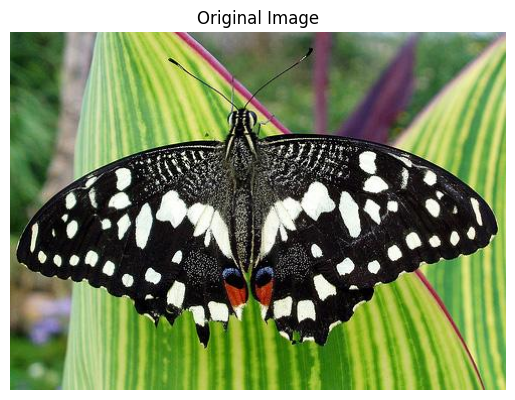

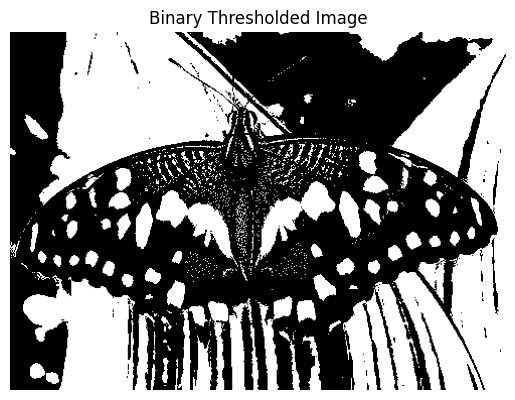

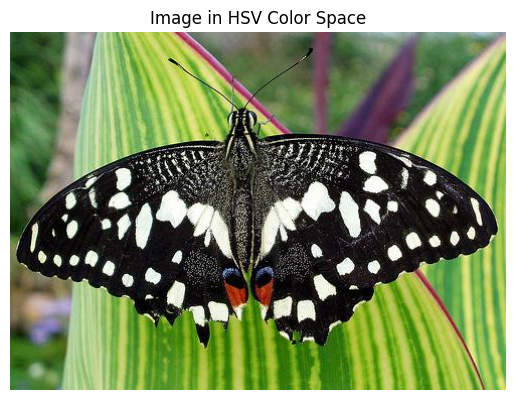

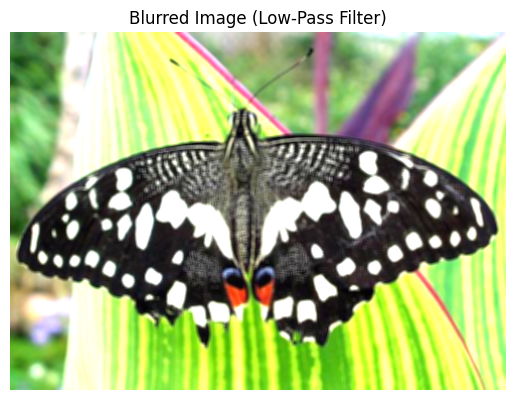

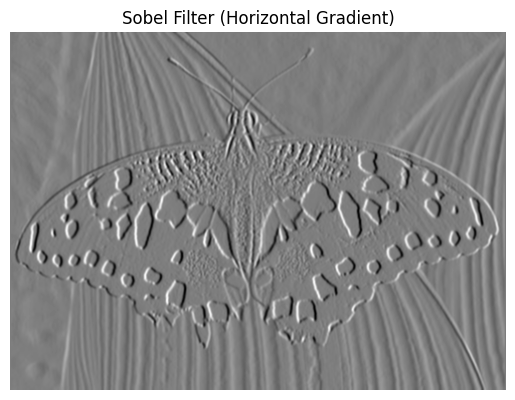

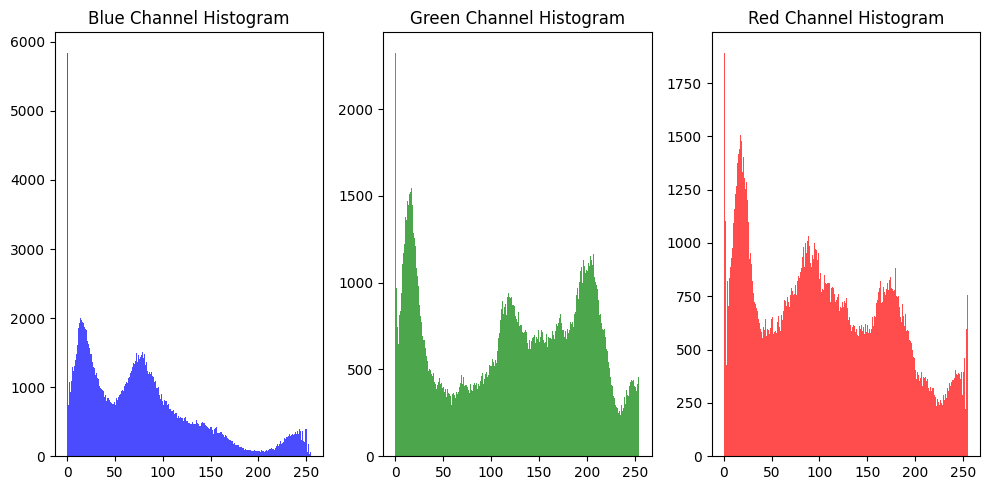

In [11]:
#open and display the any image of your choice
#apply a binary threshold onto the image
#convert image colorspace to HSV and display the image
#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
#plot the color histograms for the RED, BLUE, and GREEN channel of the image. Pay careful attention to the ordering of the channels

#Answer

image = cv2.imread('butterfly.jpg' )

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Binary threshold to the image in grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_thresh, cmap='gray')
plt.title("Binary Thresholded Image")
plt.axis('off')
plt.show()

# Convert the image color space to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

image_hsv_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(image_hsv_rgb)
plt.title("Image in HSV Color Space")
plt.axis('off')
plt.show()

# Create a low-pass filter and apply 2D convolution 
kernel = np.ones((4, 4), np.float32) / 10  
blurred_image = cv2.filter2D(image_rgb, -1, kernel)

plt.imshow(blurred_image)
plt.title("Blurred Image (Low-Pass Filter)")
plt.axis('off')
plt.show()

# Horizontal Sobel Filter to the grayscale version of the image
sobel_horizontal = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)

plt.imshow(sobel_horizontal, cmap='gray')
plt.title("Sobel Filter (Horizontal Gradient)")
plt.axis('off')
plt.show()

# Histograms for the Red, Blue, and Green channels

blue_channel, green_channel, red_channel = cv2.split(image)

plt.figure(figsize=(10, 5))

# Blue channel 
plt.subplot(1, 3, 1)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Blue Channel Histogram")

# Green channel 
plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
plt.title("Green Channel Histogram")

# Red channel 
plt.subplot(1, 3, 3)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
plt.title("Red Channel Histogram")

plt.tight_layout()
plt.show()
